## IST 736 Text Mining

## Assignment 2

In [ ]:
import pandas as pd
import numpy as np

In [26]:
Data_file = pd.read_csv("iSchoolpubdata_Experts_v5.csv")

In [27]:
Data_file

,Name,TitlesAndAbstracts
0,Bei Yu,Topic modeling for evaluating students' reflec...
1,Beth Patin,Struggling to breathe -- Purpose: The purpose ...
2,Bruce Kingma,University-wide entrepreneurship education -- ...
3,Bryan C Semaan,“I am uncomfortable sharing what I can't see” ...
4,Carlos Enrique Caicedo Bastidas,An initial approach towards quality of service...
5,Caroline Haythornthwaite,Linking online identities and content in conne...
6,Carsten Oesterlund,Living with Monsters? -- These proceedings of ...
7,Daniel Acuna,Science Concierge -- Finding relevant publicat...
8,Ingrid Erickson,The ethos and pragmatics of data sharing -- Th...
9,Jason Dedrick,Who captures value from science-based innovati...


## Vectorization

In [28]:
Titles_Abs= Data_file['TitlesAndAbstracts']

In [339]:
Titles_Abs[29]

"Rules of the game -- We focus on the roles that institutions play relative to information behavior. Our working definition of institution is the formal and informal constraints that form the basis for exchange, relationships, and decision-making. We know that institutions play significant roles in the creation, management, and uses of information. And, scholars have long recognized that institutions have both direct and indirect impacts on the sustainability and ethical value of information. What is less clear are the ways in which institutions and people's information behaviors are mutually-constituted. The goal of this panel is to highlight particular opportunities for expanding the current and modest level of attention to studying the roles of human institutions relative to information. To do so, this panel will involve the audience in a lively conversation about how information science views the role of institutions in information behavior. It includes a participatory design struc

In [29]:
Name = Data_file['Name']

In [30]:
Titles_Abs[0]

'Topic modeling for evaluating students\' reflective writing -- Journal writing is an important and common reflective practice in education. Students\' reflection journals also offer a rich source of data for formative assessment. However, the analysis of the textual reflections in class of large size presents challenges. Automatic analysis of students\' reflective writing holds great promise for providing adaptive real time support for students. This paper proposes a method based on topic modeling techniques for the task of themes exploration and reflection grade prediction. We evaluated this method on a sample of journal writings from pre-service teachers. The topic modeling method was able to discover the important themes and patterns emerged in students\' reflection journals. Weekly topic relevance and word count were identified as important indicators of their journal grades. Based on the patterns discovered by topic modeling, prediction models were developed to automate the asses

In [31]:
a = len(Titles_Abs)

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import normalize

In [137]:
#unigram_count_vectorizer = CountVectorizer(encoding='latin-1', binary=False, min_df=5, stop_words='english')
#unigram_count_vectorizer
unigram_tfidf_vectorizer = TfidfVectorizer(encoding='latin-1', use_idf=True, min_df=5, stop_words='english')

In [138]:
vecs = unigram_tfidf_vectorizer.fit_transform(Titles_Abs)
vecs_normalize= normalize(vecs)
vecsarray = vecs.toarray()
print(vecsarray)
print(vecs)
print(unigram_tfidf_vectorizer.vocabulary_)

[[0.0391019  0.02322969 0.         ... 0.01103383 0.         0.02554186]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.0359039  0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.02979343]
 [0.         0.         0.         ... 0.         0.         0.01451821]
 [0.         0.         0.         ... 0.         0.         0.        ]]
  (0, 648)	0.011614845273908095
  (0, 786)	0.009614708020662499
  (0, 186)	0.008513953058324262
  (0, 1105)	0.01227354834730504
  (0, 3)	0.011033827986092936
  (0, 1195)	0.013033965239338531
  (0, 205)	0.01227354834730504
  (0, 751)	0.008854291128629007
  (0, 1020)	0.060263582372367015
  (0, 1120)	0.039101895718015596
  (0, 1090)	0.017708582257258014
  (0, 414)	0.010514090311569859
  (0, 481)	0.007347860115181684
  (0, 607)	0.009219861711406761
  (0, 404)	0.013033965239338531
  (0, 17)	0.01227354834730504
  (0, 1227)	0.00685415387538341
  (0, 551)	0.

In [52]:
vecsarray.shape

(30, 1461)

In [139]:
#vecs=cv.fit_transform(Titles_Abs) 
word_list = unigram_tfidf_vectorizer.get_feature_names();    
count_list = vecs.toarray().sum(axis=0)

In [254]:
freq = dict(zip(word_list,count_list))
#freq
a = sorted(freq.items(), key=lambda item: item[1],  reverse = True)
a[:20]
#print(freq.get('2009'))
#print(unigram_count_vectorizer.vocabulary_.get('abilities'))

[('data', 3.3417241194603253),
 ('social', 3.224456732001306),
 ('information', 2.8453581266106114),
 ('research', 2.817046851834984),
 ('learning', 2.101340617484771),
 ('use', 1.9654686012491556),
 ('online', 1.9551208418005686),
 ('design', 1.8880682182730133),
 ('library', 1.8162133423386542),
 ('work', 1.654923802158007),
 ('study', 1.6465350783537454),
 ('paper', 1.6207140293225735),
 ('media', 1.5953398678879227),
 ('science', 1.5740156953277389),
 ('analysis', 1.382128649053957),
 ('based', 1.3706554776313544),
 ('model', 1.3509842896062718),
 ('using', 1.266176569990889),
 ('new', 1.2659556131159506),
 ('systems', 1.2412379374376585)]

### Cosine Similarity

In [269]:
from sklearn.metrics.pairwise import cosine_similarity

In [270]:
sim_sorted_doc_idx[0]

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29], dtype=int64)

In [ ]:
flat_list = [item for sublist in listOflist for item in sublist]

In [293]:
from sklearn.metrics.pairwise import linear_kernel
#for i in vecs:
cos_sim = cosine_similarity(vecs[0], vecs)
#cos_sim.sort(axis=1, kind = 'heapsort')
print(cos_sim)
#a = [sorted(cos_sim, reverse =  True)]
#print(a)
#sim_sorted_doc_idx = cos_sim.argsort()
sim_sorted_doc_idx = cos_sim.argsort()
print(sim_sorted_doc_idx)
print(sim_sorted_doc_idx.shape)
print()

# print the most similar doc; it's actually the original doc itself
#print(Titles_Abs[sim_sorted_doc_idx[0][len(Titles_Abs)-1]])
print()

print(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-1]])
print(Titles_Abs[sim_sorted_doc_idx[0][len(Titles_Abs)-2]])
print(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-2]])

[[1.         0.10440979 0.08641325 0.35217781 0.2296838  0.287382
  0.31861952 0.26454195 0.25201877 0.19164979 0.38578559 0.2533342
  0.21818147 0.36437689 0.29689265 0.19087624 0.26095862 0.31959234
  0.03206363 0.15770823 0.43198227 0.25614759 0.22428115 0.10751018
  0.24022985 0.13238878 0.36147253 0.19338012 0.17378406 0.26477816]]
[[18  2  1 23 25 19 28 15  9 27 12 22  4 24  8 11 21 16  7 29  5 14  6 17
   3 26 13 10 20  0]]
(1, 30)


Bei Yu
Incorporating Values Sensitive Design into Crowdsourcing Methodologies for Knowledge Collaboration -- In recent years, we have seen a dramatic increase in crowdsourcing approaches to solve problems and engage in other types of knowledge work in many domains, including genetics, health, cultural heritage, digital preservation and design. Crowdsourcing initiatives offer many potential benefits, including engaging individuals of diverse backgrounds in collaborative meaning-making and production. And yet, the potential challenges and dangers, suc

In [272]:
[sim_sorted_doc_idx[0][len(Titles_Abs)-1]]

[0]

In [273]:
sim_sorted_doc_idx[0]

array([18,  2,  1, 23, 25, 19, 28, 15,  9, 27, 12, 22,  4, 24,  8, 11, 21,
       16,  7, 29,  5, 14,  6, 17,  3, 26, 13, 10, 20,  0], dtype=int64)

In [274]:
cos_sim.sort(axis=1, kind = 'heapsort')

In [275]:
cos_sim

array([[0.03206363, 0.08641325, 0.10440979, 0.10751018, 0.13238878,
        0.15770823, 0.17378406, 0.19087624, 0.19164979, 0.19338012,
        0.21818147, 0.22428115, 0.2296838 , 0.24022985, 0.25201877,
        0.2533342 , 0.25614759, 0.26095862, 0.26454195, 0.26477816,
        0.287382  , 0.29689265, 0.31861952, 0.31959234, 0.35217781,
        0.36147253, 0.36437689, 0.38578559, 0.43198227, 1.        ]])

In [276]:
type(vecs)

scipy.sparse.csr.csr_matrix

In [277]:
Titles_Abs[0]

'Topic modeling for evaluating students\' reflective writing -- Journal writing is an important and common reflective practice in education. Students\' reflection journals also offer a rich source of data for formative assessment. However, the analysis of the textual reflections in class of large size presents challenges. Automatic analysis of students\' reflective writing holds great promise for providing adaptive real time support for students. This paper proposes a method based on topic modeling techniques for the task of themes exploration and reflection grade prediction. We evaluated this method on a sample of journal writings from pre-service teachers. The topic modeling method was able to discover the important themes and patterns emerged in students\' reflection journals. Weekly topic relevance and word count were identified as important indicators of their journal grades. Based on the patterns discovered by topic modeling, prediction models were developed to automate the asses

In [290]:
cosine_similarity(vecs[1], vecs)

array([[0.10440979, 1.        , 0.10957907, 0.14952213, 0.03089763,
        0.11365893, 0.05698467, 0.06697987, 0.10446032, 0.05908794,
        0.13263792, 0.16987878, 0.06987366, 0.06760224, 0.1243853 ,
        0.05599568, 0.04792962, 0.06885201, 0.23573463, 0.08180836,
        0.08916721, 0.13639034, 0.10472728, 0.28730265, 0.11507269,
        0.0626954 , 0.12129298, 0.20084302, 0.09677291, 0.1178225 ]])

In [331]:
df6 = pd.DataFrame()

In [306]:
x = []
cos_sim = cosine_similarity(vecs[1], vecs)
sim_sorted_doc_idx = cos_sim.argsort()
sim_sorted_doc_idx[0]
x.append(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-1]])


'Bei Yu'

In [312]:
x = []
b = []
c = []
for i in range(0,30):
    cos_sim = cosine_similarity(vecs[i], vecs)
    cos_sim1 = cos_sim
    cos_sim1.sort(axis=1, kind = "heapsort")
    #a.append(i)
    #print(cos_sim)
    sim_sorted_doc_idx = cos_sim.argsort()
    #print(sim_sorted_doc_idx)
    #print(sim_sorted_doc_idx.shape)
    #print(Titles_Abs[sim_sorted_doc_idx[0][len(Titles_Abs)-2]])
    
    x.append(Name[i])
    b.append(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-2]])
    c.append(cos_sim1[0][len(Titles_Abs)-2])
    #print(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-2]])
    x.append('')
    b.append(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-3]])
    c.append(cos_sim1[0][len(Titles_Abs)-3])
    #print(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-3]])
    x.append("")
    b.append(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-4]])
    c.append(cos_sim1[0][len(Titles_Abs)-4])
    #print(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-4]])
    x.append("")
    b.append(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-5]])
    c.append(cos_sim1[0][len(Titles_Abs)-5])
    #print(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-5]])
    x.append("")
    b.append(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-6]])
    c.append(cos_sim1[0][len(Titles_Abs)-6])
    #print(Name[sim_sorted_doc_idx[0][len(Titles_Abs)-6]])

In [332]:
df6['profName'] = x

In [333]:
df6['Article&Abstract'] = b

In [334]:
df6['cosine_sim_scores'] = c

In [338]:
df6.head(20)

,profName,Article&Abstract,cosine_sim_scores
0,Bei Yu,Radhika Garg,0.431982
1,,Rachel Clarke,0.385786
2,,Ping Zhang,0.364377
3,,Murali Venkatesh,0.361473
4,,Michelle L Kaarst-Brown,0.352178
5,Beth Patin,Radhika Garg,0.287303
6,,Rachel Clarke,0.235735
7,,Ping Zhang,0.200843
8,,Murali Venkatesh,0.169879
9,,Michelle L Kaarst-Brown,0.149522


## K Means Clustering

In [159]:
import pandas as pd
from sklearn.cluster import KMeans

In [160]:
KM = pd.DataFrame(vecsarray, columns=word_list)

In [161]:
KM.head()

,000,10,11,12,14,15,18,2007,2008,2009,...,workers,workforce,working,works,workshop,world,writing,written,year,years
0,0.039102,0.023230,0.0,0.011034,0.000000,0.000000,0.000000,0.000000,0.012274,0.0,...,0.010514,0.000000,0.000000,0.0,0.042056,0.027417,0.034845,0.011034,0.000000,0.025542
1,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.046592,0.166078,0.000000,0.0,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.035904,0.000000
3,0.012325,0.010983,0.0,0.000000,0.024651,0.011606,0.000000,0.000000,0.000000,0.0,...,0.000000,0.011606,0.026156,0.0,0.049713,0.012963,0.010983,0.010434,0.000000,0.000000
4,0.000000,0.000000,0.0,0.000000,0.000000,0.014816,0.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.055650,0.0,0.000000,0.000000,0.000000,0.013320,0.000000,0.030833


In [162]:
KM_subset_labels = Data_file['Name'].values

In [163]:
from sklearn.preprocessing import StandardScaler

In [164]:
X = StandardScaler().fit_transform(KM)

In [249]:
len(vecsarray)

30

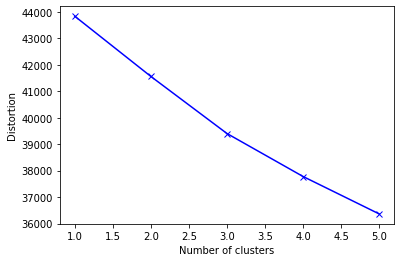

In [177]:
distortions = []
for i in range(1, 6):
    km = KMeans(
        n_clusters=i, init='random',
        n_init=10, max_iter=100,random_state=5623
    )
    km.fit(X)
    distortions.append(km.inertia_)

# plot
plt.plot(range(1,6), distortions, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

In [185]:
k = 3
km = KMeans(n_clusters=k, init='random', n_init=10, max_iter=1000, random_state=5623)
km.fit(X)
prediction = km.predict(X)
print(km.cluster_centers_)
cm = pd.crosstab(KM_subset_labels, km.labels_)
print(cm)
print()

[[-0.03064218 -0.07693844 -0.33691449 ... -0.24287369 -0.22826717
  -0.42113519]
 [ 0.34686251  0.53118676  0.53962188 ...  0.57290725  0.13645245
   0.84329655]
 [-0.38077087 -0.50307984  0.17894279 ... -0.11621316  0.42677587
  -0.00136822]]
col_0                            0  1  2
row_0                                   
Bei Yu                           0  1  0
Beth Patin                       1  0  0
Bruce Kingma                     1  0  0
Bryan C Semaan                   1  0  0
Carlos Enrique Caicedo Bastidas  0  0  1
Caroline Haythornthwaite         1  0  0
Carsten Oesterlund               1  0  0
Daniel Acuna                     0  1  0
Ingrid Erickson                  1  0  0
Jason Dedrick                    0  0  1
Jeffrey Hemsley                  1  0  0
Jeffrey M Stanton                0  1  0
Jeffrey Saltz                    1  0  0
Jennifer Stromer-Galley          0  1  0
Jian Qin                         0  0  1
Joon S Park                      0  0  1
Joshua Introne    

In [182]:
Data_file['label'] = km.labels_

In [244]:
vecsarray

array([[0.0391019 , 0.02322969, 0.        , ..., 0.01103383, 0.        ,
        0.02554186],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.0359039 ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.02979343],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.01451821],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [183]:
Data_file

,Name,TitlesAndAbstracts,label
0,Bei Yu,Topic modeling for evaluating students' reflec...,1
1,Beth Patin,Struggling to breathe -- Purpose: The purpose ...,0
2,Bruce Kingma,University-wide entrepreneurship education -- ...,0
3,Bryan C Semaan,“I am uncomfortable sharing what I can't see” ...,0
4,Carlos Enrique Caicedo Bastidas,An initial approach towards quality of service...,2
5,Caroline Haythornthwaite,Linking online identities and content in conne...,0
6,Carsten Oesterlund,Living with Monsters? -- These proceedings of ...,0
7,Daniel Acuna,Science Concierge -- Finding relevant publicat...,1
8,Ingrid Erickson,The ethos and pragmatics of data sharing -- Th...,0
9,Jason Dedrick,Who captures value from science-based innovati...,2


In [ ]:
prediction = km.predict(X)

In [186]:
prediction

array([1, 0, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 0, 1, 2, 2, 0, 1, 0, 2, 1, 0,
       1, 0, 2, 0, 1, 0, 0, 0])

In [195]:
def get_top_features_cluster(vecsarray, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.max(vecsarray[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = word_list
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs


In [245]:
dfs = get_top_features_cluster(vecsarray, prediction, 15)
#plotWords(dfs, 4)

In [241]:
import seaborn as sns

In [242]:
def plotWords(dfs, n_feats):
    for i in range(0, len(dfs)):
        plt.figure(figsize=(8, 2))
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])


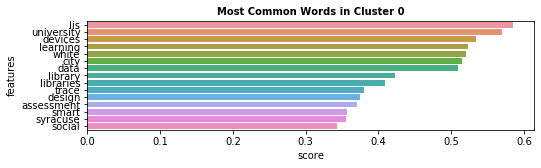

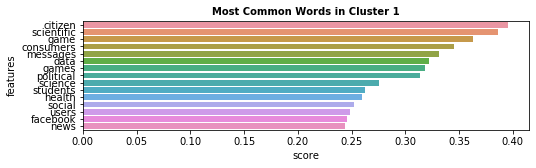

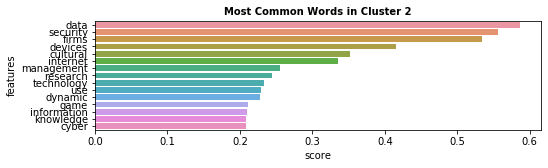

In [340]:
plotWords(dfs, 20)

In [248]:
dfs

[      features     score
 0          lis  0.584524
 1   university  0.569724
 2      devices  0.534760
 3     learning  0.523056
 4        white  0.520882
 5         city  0.514723
 6         data  0.509224
 7      library  0.423167
 8    libraries  0.409719
 9        trace  0.380324
 10      design  0.374406
 11  assessment  0.370754
 12       smart  0.357488
 13    syracuse  0.354982
 14      social  0.342438,
       features     score
 0      citizen  0.395534
 1   scientific  0.385894
 2         game  0.362694
 3    consumers  0.345600
 4     messages  0.331015
 5         data  0.321824
 6        games  0.317975
 7    political  0.313639
 8      science  0.275948
 9     students  0.262960
 10      health  0.259597
 11      social  0.252283
 12       users  0.248268
 13    facebook  0.245471
 14        news  0.243912,
        features     score
 0          data  0.586687
 1      security  0.555654
 2         firms  0.534726
 3       devices  0.415939
 4      cultural  0.351383
 5  

In [192]:
#https://towardsdatascience.com/k-means-clustering-8e1e64c1561c

## Topic Modelling

In [ ]:
## https://towardsdatascience.com/lda-topic-modeling-an-explanation-e184c90aadcd

In [209]:
documents = Data_file['TitlesAndAbstracts']

In [346]:
no_features = 500
tf_vectorizer = CountVectorizer(max_df=0.95, min_df=2, max_features=no_features, stop_words='english')
tf = tf_vectorizer.fit_transform(documents)
tf_feature_names = tf_vectorizer.get_feature_names()

In [347]:
tf_feature_names

['2016',
 'ability',
 'academic',
 'access',
 'achieve',
 'active',
 'activities',
 'activity',
 'addition',
 'address',
 'adoption',
 'advance',
 'affect',
 'affordances',
 'aims',
 'analysis',
 'analytics',
 'analyze',
 'application',
 'applications',
 'approach',
 'approaches',
 'area',
 'areas',
 'article',
 'articles',
 'artifacts',
 'aspects',
 'assess',
 'assessing',
 'assessment',
 'associated',
 'attack',
 'attention',
 'authors',
 'automated',
 'automation',
 'available',
 'awareness',
 'based',
 'behavior',
 'behavioral',
 'behaviors',
 'benefit',
 'benefits',
 'better',
 'big',
 'bots',
 'building',
 'business',
 'candidates',
 'capture',
 'case',
 'challenge',
 'challenges',
 'change',
 'changes',
 'characteristics',
 'children',
 'citizen',
 'claims',
 'classification',
 'cloud',
 'cognitive',
 'collaboration',
 'collaborative',
 'collected',
 'collective',
 'comments',
 'commerce',
 'common',
 'communication',
 'communications',
 'communities',
 'community',
 'compared',

In [348]:
documents

0     Topic modeling for evaluating students' reflec...
1     Struggling to breathe -- Purpose: The purpose ...
2     University-wide entrepreneurship education -- ...
3     “I am uncomfortable sharing what I can't see” ...
4     An initial approach towards quality of service...
5     Linking online identities and content in conne...
6     Living with Monsters? -- These proceedings of ...
7     Science Concierge -- Finding relevant publicat...
8     The ethos and pragmatics of data sharing -- Th...
9     Who captures value from science-based innovati...
10    Automated Diffusion? Bots and Their Influence ...
11    eScience professional positions in the job mar...
12    Modular design of data-driven analytics models...
13    Digital Media, Power, and Democracy in Parties...
14    Transforming the data landscape -- This panel ...
15    Enhancing risk-based decisions by leveraging c...
16    Wisdom of stakeholder crowds in complex social...
17    Lightning talk -- Software is fundamental 

In [352]:
# Run LDA
from sklearn.decomposition import NMF, LatentDirichletAllocation

no_topics = 10
lda = LatentDirichletAllocation(n_components=no_topics, max_iter=5, learning_method='online', learning_offset=50.,random_state=0).fit(tf)


In [353]:
lda.components_

array([[0.90251088, 0.80618745, 0.95660302, ..., 0.75401716, 0.74689503,
        0.81957188],
       [1.34208923, 1.72907258, 2.04049231, ..., 1.36875789, 1.55906327,
        2.72393028],
       [0.83394099, 2.18316995, 2.96513438, ..., 0.73692366, 1.71217432,
        0.85112354],
       ...,
       [0.74153885, 1.59721545, 1.8202297 , ..., 0.92079293, 1.00808544,
        0.83298931],
       [0.77971415, 0.82539341, 1.17767885, ..., 0.76873364, 0.84804816,
        0.65006662],
       [4.79407549, 2.87635827, 3.56853396, ..., 3.62502472, 7.75357354,
        3.09555094]])

In [354]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 20
display_topics(lda, tf_feature_names, no_top_words)

Topic 0:
data metadata sharing study use science using devices management understanding firms smart systems knowledge method based paper results aims need
Topic 1:
spectrum use research based data management model new using scientific work paper learning science results communication dynamic systems access analysis
Topic 2:
security cloud data wireless services based users access computing systems cyber paper game user internet social approach sharing critical model
Topic 3:
firms data smart use value children research devices industry technology using greater countries new developing study global internet innovation paper
Topic 4:
social design research data learning online study work metadata new analysis security based media using public sharing model paper scientific
Topic 5:
learning library value libraries academic assessment literacy student librarians impact research using institutional assessing strategies university outcomes teaching results education
Topic 6:
social research